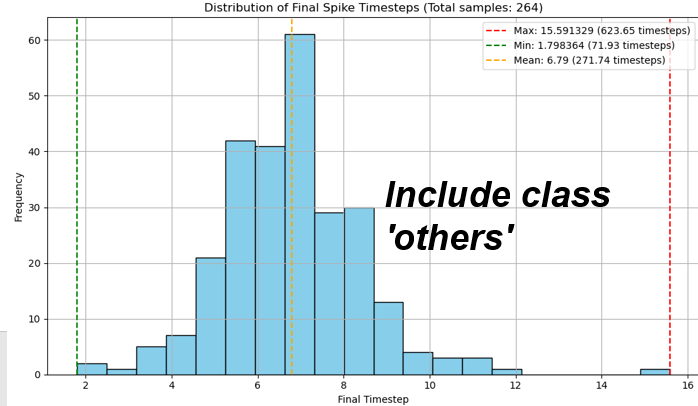

위 분포랑 완전히 같을 필요는 없지 밑은 duration이고 위는 last spike의 timestamp니까 좀 다를 수도 ㅇㅇ

밑의 합산하기 이거는 진짜 아닌듯
위 그림이랑 다르잖아


클래스별 duration 합의 통계 (초 단위):
평균: 7.424725 seconds
최대: 18.711049 seconds
최소: 1.798365 seconds


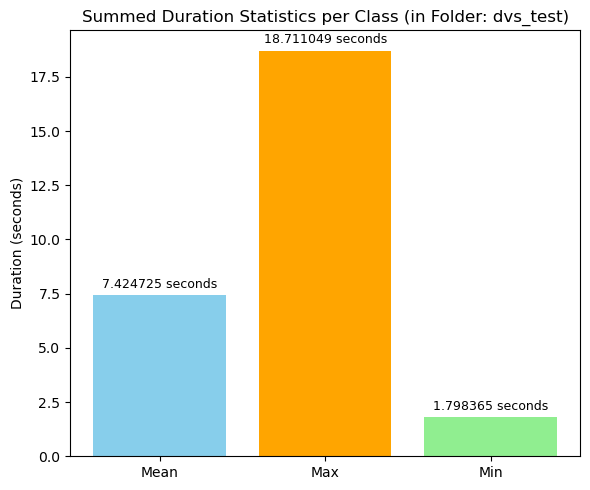

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_test'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 클래스 1부터 11까지

# 각 파일에서 클래스별 duration 합계를 담을 리스트
total_class_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    # 클래스별로 duration 합계 계산
    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            class_sum = cls_rows['duration'].sum()
            total_class_durations.append(class_sum)

# 전체 클래스 duration 합계 리스트 → 초 단위로 변환
total_class_durations = np.array(total_class_durations) * 1e-6  # usec → sec

# 통계 계산
mean_duration = np.mean(total_class_durations)
max_duration = np.max(total_class_durations)
min_duration = np.min(total_class_durations)

# 결과 출력
print(f"클래스별 duration 합의 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} seconds")
print(f"최대: {max_duration:.6f} seconds")
print(f"최소: {min_duration:.6f} seconds")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Summed Duration Statistics per Class (in Folder: {folder_path})')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


걍 다 넣기
이거 분포는 비슷한데 상식적이지못함. tonic 1077개잖아

전체 duration 통계 (초 단위):
평균: 6.805998 seconds
최대: 15.591405 seconds
최소: 1.798365 seconds


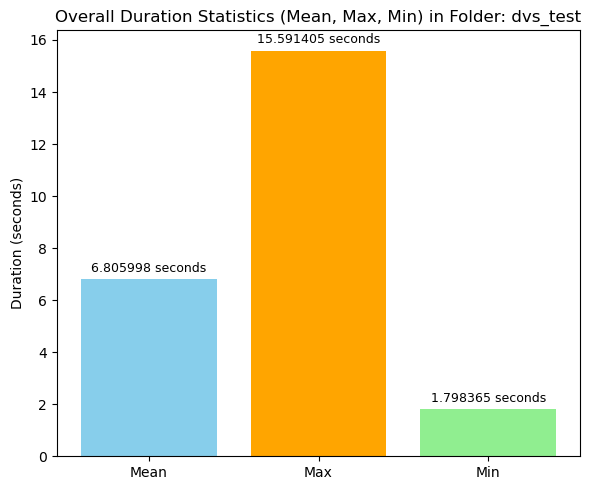

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_test'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 모든 duration 저장할 리스트
all_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    # 모든 duration을 리스트에 추가
    all_durations.extend(df['duration'].tolist())

# 전체 duration에 대해 통계 계산
all_durations = np.array(all_durations)
mean_duration = np.mean(all_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_durations) * 1e-6
min_duration = np.min(all_durations) * 1e-6

# 결과 출력
print(f"전체 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} seconds")
print(f"최대: {max_duration:.6f} seconds")
print(f"최소: {min_duration:.6f} seconds")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


위의 것만

전체 첫 번째 duration 통계 (초 단위):
평균: 6.793489 s
최대: 15.591405 s
최소: 1.798365 s


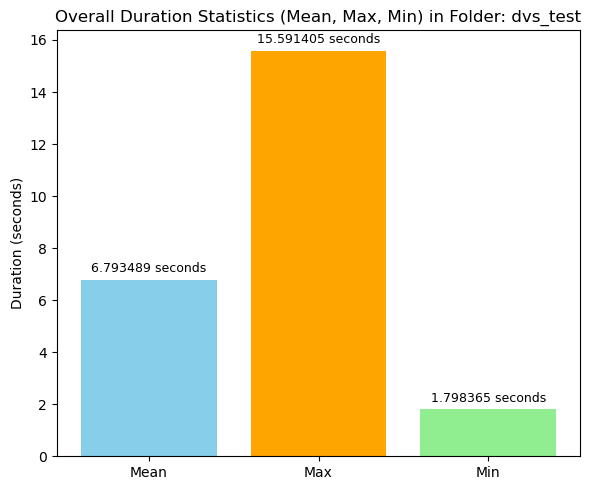

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_test'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 1부터 11까지 클래스 집합

# 모든 첫 번째 duration 저장할 리스트
all_first_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            first_duration = cls_rows.iloc[0]['duration']
            all_first_durations.append(first_duration)

# 전체 데이터에 대해 통계 계산
all_first_durations = np.array(all_first_durations)
mean_duration = np.mean(all_first_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_first_durations) * 1e-6
min_duration = np.min(all_first_durations) * 1e-6

# 결과 출력
print(f"전체 첫 번째 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} s")
print(f"최대: {max_duration:.6f} s")
print(f"최소: {min_duration:.6f} s")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시 (소수점 6자리)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

밑의 것만

전체 첫 번째 duration 통계 (초 단위):
평균: 6.791797 s
최대: 15.591405 s
최소: 1.798365 s


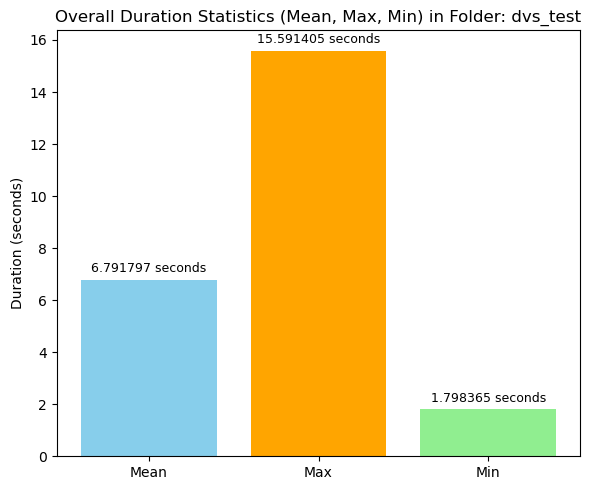

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dvs_train 폴더 경로
folder_path = 'dvs_test'

# 폴더 내 모든 .csv 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

expected_classes = set(range(1, 12))  # 1부터 11까지 클래스 집합

# 모든 첫 번째 duration 저장할 리스트
all_first_durations = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # duration 계산 (끝시간 - 시작시간)
    df['duration'] = df.iloc[:, 2] - df.iloc[:, 1]

    for cls in expected_classes:
        cls_rows = df[df['class'] == cls]
        if not cls_rows.empty:
            first_duration = cls_rows.iloc[-1]['duration']
            all_first_durations.append(first_duration)

# 전체 데이터에 대해 통계 계산
all_first_durations = np.array(all_first_durations)
mean_duration = np.mean(all_first_durations) * 1e-6  # usec -> sec
max_duration = np.max(all_first_durations) * 1e-6
min_duration = np.min(all_first_durations) * 1e-6

# 결과 출력
print(f"전체 첫 번째 duration 통계 (초 단위):")
print(f"평균: {mean_duration:.6f} s")
print(f"최대: {max_duration:.6f} s")
print(f"최소: {min_duration:.6f} s")

# 그래프 그리기
labels = ['Mean', 'Max', 'Min']
values = [mean_duration, max_duration, min_duration]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])

plt.ylabel('Duration (seconds)')
plt.title(f'Overall Duration Statistics (Mean, Max, Min) in Folder: {folder_path}')

# 막대 위에 값 표시 (소수점 6자리)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f} seconds',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [12]:
# # sweep 하는 코드, 위 셀 주석처리 해야 됨.

# # 이런 워닝 뜨는 거는 걍 너가 main 안에서  wandb.config.update(hyperparameters)할 때 물려서임. 어차피 근데 sweep에서 지정한 걸로 덮어짐 
# # wandb: WARNING Config item 'BATCH' was locked by 'sweep' (ignored update).

# unique_name_hyper = 'main'
# sweep_configuration = {
#     'method': 'bayes', # 'random', 'bayes', 'grid'
#     'name': f'my_snn_sweep{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}',
#     'metric': {'goal': 'maximize', 'name': 'val_acc_best'},
#     'parameters': 
#     {
#         # "devices": {"values": ["1"]},
#         "single_step": {"values": [True]},
#         # "unique_name": {"values": [unique_name_hyper]},
#         "my_seed": {"values": [42]},
#         "TIME": {"values": [8]},
#         "BATCH": {"values": [16]},
#         "IMAGE_SIZE": {"values": [14]},
#         "which_data": {"values": ['DVS_GESTURE_TONIC']},
#         "data_path": {"values": ['/data2']},
#         "rate_coding": {"values": [False]},
#         "lif_layer_v_init": {"values": [0.0]},
#         "lif_layer_v_decay": {"values": [0.5]},
#         "lif_layer_v_threshold": {"values": [0.5]},
#         "lif_layer_v_reset": {"values": [10000.0]},
#         "lif_layer_sg_width": {"values": [4.0]},

#         "synapse_conv_kernel_size": {"values": [3]},
#         "synapse_conv_stride": {"values": [1]},
#         "synapse_conv_padding": {"values": [1]},

#         "synapse_trace_const1": {"values": [1]},
#         "synapse_trace_const2": {"values": [0.5]},

#         "pre_trained": {"values": [False]},
#         "convTrue_fcFalse": {"values": [False]},

#         "cfg": {"values": [[200,200]]},

#         "net_print": {"values": [True]},

#         "pre_trained_path": {"values": [""]},
#         "learning_rate": {"values": [0.01,0.001,0.0001,0.00001]}, 
#         "epoch_num": {"values": [100]}, 
#         "tdBN_on": {"values": [False]},
#         "BN_on": {"values": [False]},

#         "surrogate": {"values": ['hard_sigmoid']},

#         "BPTT_on": {"values": [False]},

#         "optimizer_what": {"values": ['SGD']},
#         "scheduler_name": {"values": ['no']},

#         "ddp_on": {"values": [False]},

#         "dvs_clipping": {"values": [14]}, 

#         "dvs_duration": {"values": [25_000]}, 

#         "DFA_on": {"values": [True]},

#         "trace_on": {"values": [False]},
#         "OTTT_input_trace_on": {"values": [False]},

#         "exclude_class": {"values": [True]},

#         "merge_polarities": {"values": [True]},
#         "denoise_on": {"values": [False]},

#         "extra_train_dataset": {"values": [9]},

#         "num_workers": {"values": [2]},
#         "chaching_on": {"values": [True]},
#         "pin_memory": {"values": [True]},

#         "UDA_on": {"values": [False]},
#         "alpha_uda": {"values": [1.0]},

#         "bias": {"values": [True]},

#         "last_lif": {"values": [False]},

#         "temporal_filter": {"values": [5]},
#         "initial_pooling": {"values": [1]},

#         "temporal_filter_accumulation": {"values": [False]},

#         "quantize_bit_list_0": {"values": [6,8,10,12,14,16]},
#         "quantize_bit_list_1": {"values": [6,8,10,12,14,16]},
#         "quantize_bit_list_2": {"values": [6,8,10,12,14,16]},
#      }
# }

# def hyper_iter():
#     ### my_snn control board ########################
#     wandb.init(save_code=False, dir='/data2/bh_wandb', tags=["sweep"])

#     my_snn_system(  
#         devices  =  "5",
#         single_step  =  wandb.config.single_step,
#         unique_name  =  datetime.datetime.now().strftime("%Y%m%d_%H%M%S_") + f"{datetime.datetime.now().microsecond // 1000:03d}",
#         my_seed  =  wandb.config.my_seed,
#         TIME  =  wandb.config.TIME,
#         BATCH  =  wandb.config.BATCH,
#         IMAGE_SIZE  =  wandb.config.IMAGE_SIZE,
#         which_data  =  wandb.config.which_data,
#         data_path  =  wandb.config.data_path,
#         rate_coding  =  wandb.config.rate_coding,
#         lif_layer_v_init  =  wandb.config.lif_layer_v_init,
#         lif_layer_v_decay  =  wandb.config.lif_layer_v_decay,
#         lif_layer_v_threshold  =  wandb.config.lif_layer_v_threshold,
#         lif_layer_v_reset  =  wandb.config.lif_layer_v_reset,
#         lif_layer_sg_width  =  wandb.config.lif_layer_sg_width,
#         synapse_conv_kernel_size  =  wandb.config.synapse_conv_kernel_size,
#         synapse_conv_stride  =  wandb.config.synapse_conv_stride,
#         synapse_conv_padding  =  wandb.config.synapse_conv_padding,
#         synapse_trace_const1  =  wandb.config.synapse_trace_const1,
#         synapse_trace_const2  =  wandb.config.synapse_trace_const2,
#         pre_trained  =  wandb.config.pre_trained,
#         convTrue_fcFalse  =  wandb.config.convTrue_fcFalse,
#         cfg  =  wandb.config.cfg,
#         net_print  =  wandb.config.net_print,
#         pre_trained_path  =  wandb.config.pre_trained_path,
#         learning_rate  =  wandb.config.learning_rate,
#         epoch_num  =  wandb.config.epoch_num,
#         tdBN_on  =  wandb.config.tdBN_on,
#         BN_on  =  wandb.config.BN_on,
#         surrogate  =  wandb.config.surrogate,
#         BPTT_on  =  wandb.config.BPTT_on,
#         optimizer_what  =  wandb.config.optimizer_what,
#         scheduler_name  =  wandb.config.scheduler_name,
#         ddp_on  =  wandb.config.ddp_on,
#         dvs_clipping  =  wandb.config.dvs_clipping,
#         dvs_duration  =  wandb.config.dvs_duration,
#         DFA_on  =  wandb.config.DFA_on,
#         trace_on  =  wandb.config.trace_on,
#         OTTT_input_trace_on  =  wandb.config.OTTT_input_trace_on,
#         exclude_class  =  wandb.config.exclude_class,
#         merge_polarities  =  wandb.config.merge_polarities,
#         denoise_on  =  wandb.config.denoise_on,
#         extra_train_dataset  =  wandb.config.extra_train_dataset,
#         num_workers  =  wandb.config.num_workers,
#         chaching_on  =  wandb.config.chaching_on,
#         pin_memory  =  wandb.config.pin_memory,
#         UDA_on  =  wandb.config.UDA_on,
#         alpha_uda  =  wandb.config.alpha_uda,
#         bias  =  wandb.config.bias,
#         last_lif  =  wandb.config.last_lif,
#         temporal_filter  =  wandb.config.temporal_filter,
#         initial_pooling  =  wandb.config.initial_pooling,
#         temporal_filter_accumulation  =  wandb.config.temporal_filter_accumulation,
#         quantize_bit_list  =  [wandb.config.quantize_bit_list_0,wandb.config.quantize_bit_list_1,wandb.config.quantize_bit_list_2],
#                         ) 
#     # sigmoid와 BN이 있어야 잘된다.
#     # average pooling
#     # 이 낫다. 
    
#     # nda에서는 decay = 0.25, threshold = 0.5, width =1, surrogate = rectangle, batch = 256, tdBN = True
#     ## OTTT 에서는 decay = 0.5, threshold = 1.0, surrogate = sigmoid, batch = 128, BN = True

# # sweep_id = '58n5za4q'
# sweep_id = wandb.sweep(sweep=sweep_configuration, project=f'my_snn {unique_name_hyper}')
# wandb.agent(sweep_id, function=hyper_iter, count=10000, project=f'my_snn {unique_name_hyper}')
